# Описательная статистика и построение простых графиков при помощи Pandas

## Данные

**Датасет:​** 

Australian AIDS Survival Data

**Описание:​** 

Данные о пациентах, проходивших лечение от СПИДа до 1 июля 1991.
Датасет содержит 2843 строки и следующие столбцы:

*   State – аббревиатура названия региона Австралии.
*   Sex – пол пациента.
*   Diag – дата диагноза.
*   Death – дата смерти или окончания лечения.
*   Status - жив пациент или мертв на момент окончания наблюдения.
*   T.categ – способ заражения.
*   Age – возраст, когда пациенту был поставлен диагноз.

Полезная ссылочка на [документацию](https://pandas.pydata.org/pandas-docs/stable/index.html) Pandas.

Загружаем датасет.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Aids2.csv")
df.head()

,Unnamed: 0,state,sex,diag,death,status,T.categ,age
0,1,NSW,M,10905,11081,D,hs,35
1,2,NSW,M,11029,11096,D,hs,53
2,3,NSW,M,9551,9983,D,hs,42
3,4,NSW,M,9577,9654,D,haem,44
4,5,NSW,M,10015,10290,D,hs,39


## Описательная статистика датасета

Получим типы данных, хранящихся в датафрейме. `object` в терминологии Pandas - это строка.

In [ ]:
df.dtypes

Unnamed: 0     int64
state         object
sex           object
diag           int64
death          int64
status        object
T.categ       object
age            int64
dtype: object

Получим размеры датафрейма. Первое значение кортежа - количество строк, второе - стобцов.

In [ ]:
df.shape

(2843, 8)

С помощью метода `size` можно дополнительно узнать общее количество ячеек в датафрейме.

In [ ]:
df.size

22744

Выясним, есть ли в датафрейме пустые значения.

In [ ]:
cols = list(df.columns)
cols.remove('Unnamed: 0')
cols

['state', 'sex', 'diag', 'death', 'status', 'T.categ', 'age']

In [ ]:
df_na = {col: list(pd.isna(df[col])).count(True) for col in cols}
df_na

{'T.categ': 0,
 'age': 0,
 'death': 0,
 'diag': 0,
 'sex': 0,
 'state': 0,
 'status': 0}

Если пустые ячейки есть, то пока что можно просто удалить соответствующие строки методом [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

Для нечисловых значений посчитаем частоту встречаемости.

In [ ]:
nom_cols_data = [{name: df[col].to_list().count(name) for name in df[col].unique()}
                 for col in cols
                 if df[col].dtype == "object"]
nom_cols_data


[{'NSW': 1780, 'Other': 249, 'QLD': 226, 'VIC': 588},
 {'F': 89, 'M': 2754},
 {'A': 1082, 'D': 1761},
 {'blood': 94,
  'haem': 46,
  'het': 41,
  'hs': 2465,
  'hsid': 72,
  'id': 48,
  'mother': 7,
  'other': 70}]

Так как числовые значения присутствуют только в одном на данный момент значимом стобце (возраст), посчитаем для этого столбца некоторые меры центральной тенденции и разброса:


*   минимальное значение
*   максимальное значение
*   среднее арифметическое
*   моду
*   медиану
*   дисперсию
*   стандартное отклонение
*   размах
*   интерквартильный размах
*   индекс асимметрии



In [ ]:
age_stat = {"min": df["age"].min(), 
            "max": df["age"].max(), 
            "mean": df["age"].mean(),
            "median": df["age"].median(),
            "mode": df["age"].mode().to_list(),
            "var": df["age"].var(ddof=0),
            "std": df["age"].std(ddof=0),
            "range": df["age"].max() - df["age"].min(),
            "interquartile_range": df["age"].quantile(0.75) - df["age"].quantile(0.25),
            "skew": df["age"].skew()
            }
age_stat

{'interquartile_range': 13.0,
 'max': 82,
 'mean': 37.409074920858245,
 'median': 37.0,
 'min': 0,
 'mode': [39],
 'range': 82,
 'skew': 0.4877463385489102,
 'std': 10.061493059395177,
 'var': 101.23364258425732}

Построим график распределения количества заражений по каждому возрасту.

In [ ]:
age_data = {age: df["age"].to_list().count(age) for age in set(df["age"])}
print(age_data)

{0: 4, 1: 3, 3: 3, 5: 3, 6: 2, 9: 1, 11: 1, 12: 5, 13: 1, 14: 2, 15: 3, 16: 3, 17: 3, 18: 3, 19: 2, 20: 7, 21: 12, 22: 18, 23: 29, 24: 52, 25: 78, 26: 85, 27: 90, 28: 96, 29: 117, 30: 117, 31: 105, 32: 118, 33: 116, 34: 112, 35: 117, 36: 101, 37: 122, 38: 108, 39: 127, 40: 95, 41: 113, 42: 92, 43: 99, 44: 73, 45: 77, 46: 65, 47: 57, 48: 49, 49: 47, 50: 37, 51: 35, 52: 33, 53: 26, 54: 13, 55: 23, 56: 24, 57: 18, 58: 14, 59: 10, 60: 8, 61: 6, 62: 7, 63: 6, 64: 7, 65: 6, 66: 11, 67: 4, 68: 1, 69: 7, 70: 3, 71: 1, 72: 1, 73: 3, 74: 1, 77: 1, 78: 2, 80: 1, 82: 1}


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
age_df = pd.DataFrame.from_dict(data=age_data, orient="index", columns=["Age"])
age_df.head()

,Age
0,4
1,3
3,3
5,3
6,2


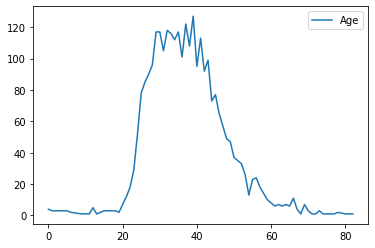

In [ ]:
age_df.plot();

Сравним, как картинка будет выглядеть для женщин и для мужчин. Для начала найдем количество записей о женщинах и о мужчинах.

In [ ]:
male_df = df.loc[df["sex"] == "M"]
m_num = male_df.shape[0]
m_percent = m_num / df.shape[0] * 100
print(m_num, m_percent, sep="\n")
male_df.head()

2754
96.86950404502286


,Unnamed: 0,state,sex,diag,death,status,T.categ,age
0,1,NSW,M,10905,11081,D,hs,35
1,2,NSW,M,11029,11096,D,hs,53
2,3,NSW,M,9551,9983,D,hs,42
3,4,NSW,M,9577,9654,D,haem,44
4,5,NSW,M,10015,10290,D,hs,39


In [ ]:
female_df = df.loc[df["sex"] == "F"]
f_num = female_df.shape[0]
f_percent = f_num / df.shape[0] * 100
print(f_num, f_percent, sep="\n")
female_df.head()

89
3.1304959549771367


,Unnamed: 0,state,sex,diag,death,status,T.categ,age
30,31,NSW,F,10961,11504,A,id,30
65,66,NSW,F,9014,9152,D,blood,44
85,86,NSW,F,9258,9259,D,blood,25
92,93,NSW,F,9349,9392,D,blood,55
104,105,NSW,F,9385,9600,D,blood,70


Судя по процентному соотношению, можно сделать вывод, что женщины практически не участвовали в исследовании. Все равно построим график.

In [ ]:
m_data = {age: male_df["age"].to_list().count(age) for age in set(male_df["age"])}
to_add_f_data = {age: 0 for age in set(df["age"]) if age not in set(male_df["age"])}
m_data.update(to_add_f_data)
age_m_df = pd.DataFrame.from_dict(data=m_data, 
                                  orient="index", 
                                  columns=["Males age"])

In [ ]:
f_data = {age: female_df["age"].to_list().count(age) for age in set(female_df["age"])}
to_add_m_data = {age: 0 for age in set(df["age"]) if age not in set(female_df["age"])}
f_data.update(to_add_m_data)
age_f_df = pd.DataFrame.from_dict(data=f_data, 
                                  orient="index", 
                                  columns=["Females age"])

In [ ]:
age_all = age_df.merge(age_m_df, left_index=True, right_index=True)
age_all = age_all.merge(age_f_df, left_index=True, right_index=True)
age_all.head()

,Age,Males age,Females age
0,4,3,1
1,3,2,1
3,3,3,0
5,3,1,2
6,2,1,1


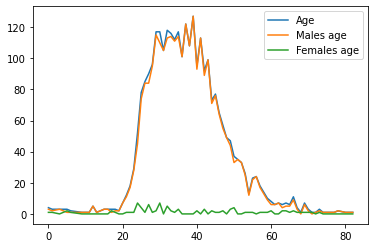

In [ ]:
age_all.plot();

Видим, что график для мужчин практически полностью накладывается на общий график. Можно считать, что записи о женщинах в конкретно этом датасете - шум, а исследование было ориентировано в первую очередь на мужчин. Для наглядности построим круговую диаграмму распределения мужчин и женщин.

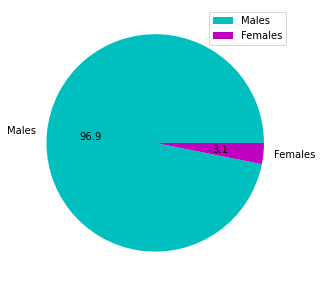

In [ ]:
age_pie = pd.DataFrame({"": [m_num, f_num]},
                       index=["Males", "Females"])
age_pie.plot.pie(y="",
                 colors=["c", "m"],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(5, 5));

Посмотрим, как колеблется число респондентов в группе интерквартильного размаха - содержащей наиболее релевантные данные.

In [ ]:
q1 = male_df["age"].quantile(0.25)
q2 = male_df["age"].quantile(0.5)
q3 = male_df["age"].quantile(0.75)

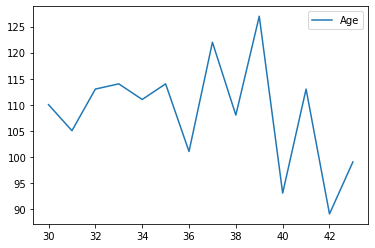

In [ ]:
df_inter = male_df.query("@q1 <= age <= @q3")
inter_age = pd.DataFrame.from_dict(data={age: df_inter["age"].to_list().count(age) for age in set(df_inter["age"])},
                                   orient="index", 
                                   columns=["Age"]).sort_index()
inter_age.plot();

Посмотрим, в какой возрастной группе больше выживших, а в какой умерших.

In [ ]:
index = ["[%d;%d)" %(round(age_stat["min"]), round(q1)), 
         "[%d;%d)" %(round(q1), round(q2)), 
         "[%d;%d)" %(round(q2), round(q3)), 
         "[%d;%d]" %(round(q3), round(age_stat["max"]))]
index

['[0;30)', '[30;37)', '[37;43)', '[43;82]']

In [ ]:
index = ["[%d;%d)" %(round(age_stat["min"]), round(q1)), 
         "[%d;%d)" %(round(q1), round(q3)), 
         "[%d;%d]" %(round(q3), round(age_stat["max"]))]

In [ ]:
alive = [male_df.query("age < @q1 & status == 'A'").shape[0], 
         male_df.query("@q1 <= age < @q3 & status == 'A'").shape[0],
         male_df.query("age >= @q3 & status == 'A'").shape[0]]

dead = [male_df.query("age < @q1 & status == 'D'").shape[0], 
         male_df.query("@q1 <= age < @q3 & status == 'D'").shape[0],
         male_df.query("age >= @q3 & status == 'D'").shape[0]]

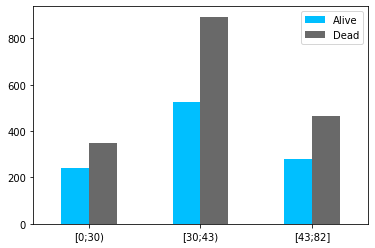

In [ ]:
dead_or_alive = pd.DataFrame({"Alive": alive, "Dead": dead}, index=index)
dead_or_alive.plot.bar(color=["deepskyblue", "dimgrey"],
                       rot=0);

Видим, что во всех группах умерших больше. Единственная группа, в которой показатели максимально близки - до 30. Можно предположить, что при большем количестве наблюдений здесь могло бы быть больше выживших.

Названия цветов можно найти [тут](https://matplotlib.org/stable/gallery/color/named_colors.html).

Визуализируем, распределение исследованных случаем заражения СПИДом по регионам. Сразу же сравним результаты для всех представленных в датасете данных с данными, в которых нет группы регионов Other.

In [ ]:
regions_data = {name: male_df["state"].to_list().count(name) for name in male_df["state"].unique()}

In [ ]:
cases = []
regions = []
for region, cases_num in regions_data.items():
  regions.append(region)
  cases.append(cases_num)

regions_info = pd.DataFrame({"": cases},
                       index=regions)

In [ ]:
cases1 = []
regions1 = []
for region, cases_num in regions_data.items():
  if region != "Other":
    regions1.append(region)
    cases1.append(cases_num)

regions_info1 = pd.DataFrame({"": cases1},
                       index=regions1)

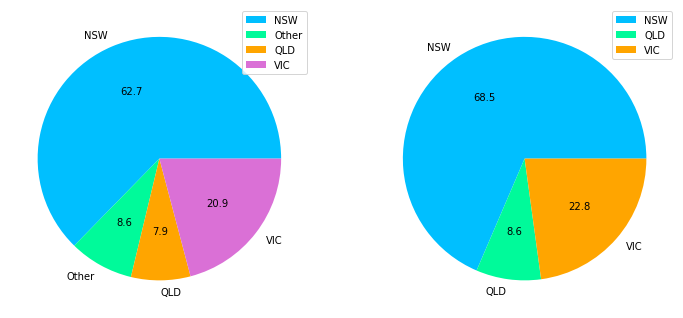

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
regions_info.plot.pie(ax=axes[0], y="",
                 colors=["deepskyblue", "mediumspringgreen", "orange", "orchid"],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(12, 12));
regions_info1.plot.pie(ax=axes[1], y="",
                 colors=["deepskyblue", "mediumspringgreen", "orange"],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(12, 12));

Распределение меняется слабо. Вывод - группа Other не хранит принципиально важных данных.

Посмотрим на способы заражения. Для начала просто визуализируем количество заражений по каждой категории.

In [ ]:
from operator import itemgetter

In [ ]:
infection_data = [(name, male_df["T.categ"].to_list().count(name)) 
                  for name in male_df["T.categ"].unique() 
                  if male_df["T.categ"].to_list().count(name) > 0]
infection_data = sorted(infection_data, key=itemgetter(1))
infection_data

[('mother', 3),
 ('het', 21),
 ('id', 28),
 ('haem', 46),
 ('blood', 57),
 ('other', 63),
 ('hsid', 72),
 ('hs', 2464)]

Видим, что hs - основной способ заражения. Скорее всего, он был бейзлайном исследования. Сравним визуализации с ним и без него (также исключим Other).

In [ ]:
infection_data_opt = [i for i in infection_data if "other" != i[0] != "hs"]
infection_data_opt

[('mother', 3),
 ('het', 21),
 ('id', 28),
 ('haem', 46),
 ('blood', 57),
 ('hsid', 72)]

In [ ]:
categories_opt = []
patients_opt = []
for categ, count in infection_data_opt:
  categories_opt.append(categ)
  patients_opt.append(count)

In [ ]:
categories = []
patients = []
for categ, count in infection_data:
  categories.append(categ)
  patients.append(count)

In [ ]:
inf_df = pd.DataFrame({"category": categories, "cases": patients})
inf_df_opt = pd.DataFrame({"category": categories_opt, "cases": patients_opt})

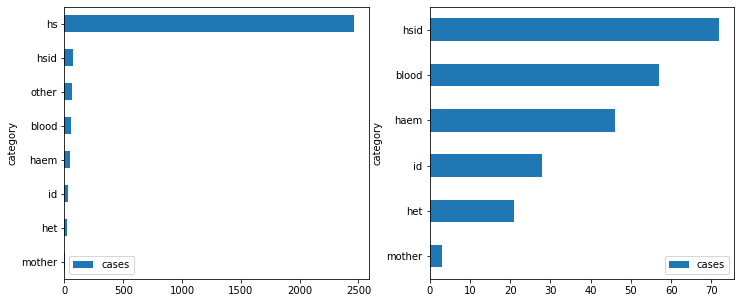

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
inf_df.plot.barh(ax=axes[0], x="category", y="cases", figsize=(12, 5));
inf_df_opt.plot.barh(ax=axes[1], x="category", y="cases", figsize=(12, 5));

Результат получается более наглядным справа, если нас интересует вариативная составляющая исследования. Наложим на эти графики распределение по штатам.

In [ ]:
infection_data_reg = [(name,
                   male_df["T.categ"].to_list().count(name),
                   male_df.query("state == 'NSW'")["T.categ"].to_list().count(name),
                   male_df.query("state == 'VIC'")["T.categ"].to_list().count(name),
                   male_df.query("state == 'QLD'")["T.categ"].to_list().count(name)) 
                  for name in male_df["T.categ"].unique() 
                  if male_df["T.categ"].to_list().count(name) > 0]

infection_data_reg = sorted(infection_data_reg, key=itemgetter(1))
infection_df = pd.DataFrame.from_records(infection_data_reg, 
                                         columns=["Category", "Total", "NSW", "VIC", "QLD"])
infection_df

,Category,Total,NSW,VIC,QLD
0,mother,3,2,0,0
1,het,21,12,3,3
2,id,28,15,3,3
3,haem,46,30,6,4
4,blood,57,41,2,11
5,other,63,37,14,4
6,hsid,72,50,11,7
7,hs,2464,1539,536,185


In [ ]:
infection_df_opt = infection_df[(infection_df["Category"] != "other") & (infection_df["Category"] != "hs")]
infection_df_opt

,Category,Total,NSW,VIC,QLD
0,mother,3,2,0,0
1,het,21,12,3,3
2,id,28,15,3,3
3,haem,46,30,6,4
4,blood,57,41,2,11
6,hsid,72,50,11,7


In [ ]:
df_draw = pd.DataFrame({"NSW": infection_df["NSW"].to_list(),
                        "VIC": infection_df["VIC"].to_list(),
                        "QLD": infection_df["QLD"].to_list()},
                       index=infection_df["Category"].to_list())
df_draw_opt = pd.DataFrame({"NSW": infection_df_opt["NSW"].to_list(),
                        "VIC": infection_df_opt["VIC"].to_list(),
                        "QLD": infection_df_opt["QLD"].to_list()},
                       index=infection_df_opt["Category"].to_list())

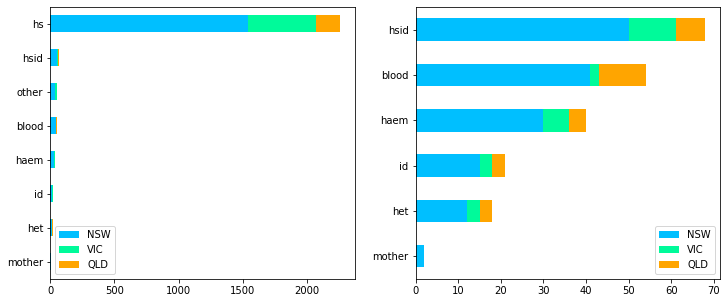

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df_draw.plot.barh(ax=axes[0],
                  color=["deepskyblue", "mediumspringgreen", "orange"],
                  stacked=True,
                  figsize=(12, 5));
df_draw_opt.plot.barh(ax=axes[1],
                      color=["deepskyblue", "mediumspringgreen", "orange"],
                      stacked=True,
                      figsize=(12, 5));

## Тренировочное задание

Тренировочный датасет: [вакицнация COVID](https://drive.google.com/file/d/1TtQ6_A5XQ0nBuyuC1EsJuPi0D70LMwS1/view?usp=sharing).

In [ ]:
df = pd.read_excel("country_vaccinations.xls")

NameError: ignored

1. Визуализировать распределение прошедших вакционацию людей по странам Европы.
2. Показать изменение количества вакцинаций в день для любой страны.
3. Какие вакцины используются в каких странах?
4. Визуализировать распределение прошедших вакционацию людей по странам Европы в процентах.
